import library

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#TASK1

mount the  text file

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
path="/content/drive/MyDrive/Project/train-perceptron.txt"

In [22]:
df = pd.read_csv(path, sep=" " , dtype = 'float64', names=['x1', 'x2', 'label'], header = None)
df

,x1,x2,label
0,1.0,1.0,1.0
1,1.0,-1.0,1.0
2,2.0,2.5,2.0
3,0.0,2.0,2.0
4,2.0,3.0,2.0
5,4.0,5.0,1.0


Plotting DataPoint

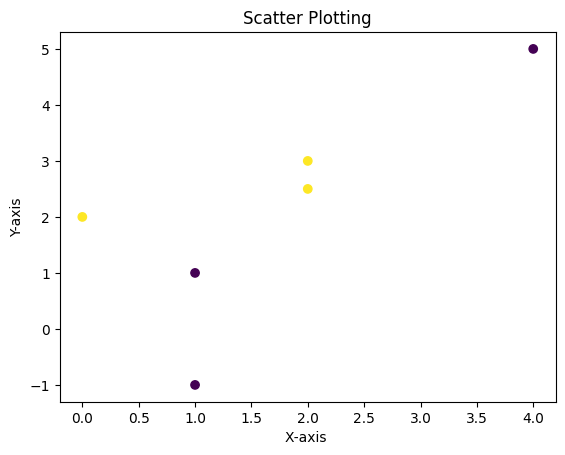

In [23]:
plt.scatter(
    x=df['x1'],
    y= df['x2'],
    c=df['label']
     )
plt.xlabel('X-axis ')
plt.ylabel('Y-axis')
plt.title('Scatter Plotting')
plt.show()

#From this plotting , it shows that the datapoints are not linearly separable.

#Task 2
#Generating the high dimensional sample points

In [24]:
def phi(data):
  data.insert(0, 'x1^2', data['x1']**2)
  data.insert(1, 'x2^2', data['x2']**2)
  data.insert(2, 'x1*x2', data['x1']*data['x2'])
  data.insert(5, '1', 1)
  return data

In [25]:
df = phi(df)
df

,x1^2,x2^2,x1*x2,x1,x2,1,label
0,1.0,1.00,1.0,1.0,1.0,1,1.0
1,1.0,1.00,-1.0,1.0,-1.0,1,1.0
2,4.0,6.25,5.0,2.0,2.5,1,2.0
3,0.0,4.00,0.0,0.0,2.0,1,2.0
4,4.0,9.00,6.0,2.0,3.0,1,2.0
5,16.0,25.00,20.0,4.0,5.0,1,1.0


#AFTER NORMALIZATION


In [26]:
df.loc[df['label'] == 2.0, df.columns != "label"] *= -1
df

,x1^2,x2^2,x1*x2,x1,x2,1,label
0,1.0,1.00,1.0,1.0,1.0,1,1.0
1,1.0,1.00,-1.0,1.0,-1.0,1,1.0
2,-4.0,-6.25,-5.0,-2.0,-2.5,-1,2.0
3,-0.0,-4.00,-0.0,-0.0,-2.0,-1,2.0
4,-4.0,-9.00,-6.0,-2.0,-3.0,-1,2.0
5,16.0,25.00,20.0,4.0,5.0,1,1.0


#TASK3

Many At a Time

In [27]:
def manyatatime(y, weight, lr):
  for itr in range(300):
    tempara = np.zeros_like(y)
    flag = 0
    for i in range(y.shape[0]):
      wty = np.dot(weight, np.array(y.iloc[i]))
      if wty <= 0.0:
        flag = 1
        tempara[i] = np.array(y.iloc[i])
    if flag == 0:
      break
    #update weight
    weight = weight + lr * np.sum(tempara, axis=0)

    print("Final weight: ", weight)
    print("No of itr: ", itr + 1)
  return itr + 1

One At a time

In [28]:
def oneatatime(y, weight, lr):
  for itr in range(300):
    flag = 0
    for i in range(y.shape[0]):
      wty = np.dot(weight, np.array(y.iloc[i]))
      if wty <= 0.0:
        flag = 1
        weight = weight + lr * np.array(y.iloc[i])
    if flag == 0:
      break

    print("Final weight: ", weight)
    print("No of itr: ", itr + 1)
  return itr + 1

In [29]:
tempdf = df.drop("label", axis='columns')
tempdf

,x1^2,x2^2,x1*x2,x1,x2,1
0,1.0,1.00,1.0,1.0,1.0,1
1,1.0,1.00,-1.0,1.0,-1.0,1
2,-4.0,-6.25,-5.0,-2.0,-2.5,-1
3,-0.0,-4.00,-0.0,-0.0,-2.0,-1
4,-4.0,-9.00,-6.0,-2.0,-3.0,-1
5,16.0,25.00,20.0,4.0,5.0,1


#TASK 4


In [30]:
np.random.seed(24)
weight_zeros = np.zeros(tempdf.shape[1])
weight_random = np.random.random(tempdf.shape[1])
weight_ones = np.ones(tempdf.shape[1])
weight_list = [weight_ones, weight_zeros, weight_random]

list_all_zeros_df = []
list_all_ones_df = []
list_random_df = []

for ind, weights in enumerate(weight_list):
  learning_rate = 0.1
  while learning_rate <= 1.0:

    itr_many = manyatatime(tempdf, weights, learning_rate)
    itr_one = oneatatime(tempdf, weights, learning_rate)

    if ind == 0:
      list_all_ones_df.append([learning_rate, itr_one, itr_many])
    elif ind == 1:
      list_all_zeros_df.append([learning_rate, itr_one, itr_many])
    else:
      list_random_df.append([learning_rate, itr_one, itr_many])

    learning_rate = round(learning_rate + 0.1, 2)

record_all_zeros_df = pd.DataFrame(list_all_zeros_df, columns = ['Alpha (Learning rate)', 'One at a Time', 'Many at a Time'])
record_all_ones_df = pd.DataFrame(list_all_ones_df, columns = ['Alpha (Learning rate)', 'One at a Time', 'Many at a Time'])
record_random_df = pd.DataFrame(list_random_df, columns = ['Alpha (Learning rate)', 'One at a Time', 'Many at a Time'])

Streaming output truncated to the last 5000 lines.
   2.73984099]
No of itr:  76
Final weight:  [ 20.1600173  -16.30048795   8.19986729  -2.9799327  -19.63894365
   2.33984099]
No of itr:  77
Final weight:  [ 26.9600173   -5.90048795  16.59986729  -0.9799327  -17.23894365
   3.13984099]
No of itr:  78
Final weight:  [ 23.7600173  -12.00048795  12.19986729  -2.5799327  -19.43894365
   2.33984099]
No of itr:  79
Final weight:  [ 22.1600173  -14.50048795  10.19986729  -3.3799327  -20.43894365
   1.93984099]
No of itr:  80
Final weight:  [ 22.5600173  -14.10048795  10.59986729  -2.9799327  -20.03894365
   2.33984099]
No of itr:  81
Final weight:  [ 21.3600173  -16.20048795   8.99986729  -3.3799327  -20.63894365
   2.33984099]
No of itr:  82
Final weight:  [ 21.7600173  -15.80048795   9.39986729  -2.9799327  -20.23894365
   2.73984099]
No of itr:  83
Final weight:  [ 22.1600173  -15.40048795   9.79986729  -2.5799327  -19.83894365
   3.13984099]
No of itr:  84
Final weight:  [ 22.5600173  -1

##Showing all statistics in table and bar chart

In [31]:
def show_bar_chart(record):
  bar1 = np.arange(record.shape[0])

  barWidth = 0.3
  bar2 = [x + barWidth for x in bar1]

  plt.figure(figsize = (15, 10))

  # Make the plot
  plt.bar(bar1, list(record['One at a Time']), width = barWidth,
            label ='One at a time')
  plt.bar(bar2, list(record['Many at a Time']), width = barWidth,
            label ='Many at a time')
  # Adding Xticks
  plt.xlabel('Learning rate', fontsize = 15)
  plt.ylabel('No of iteration', fontsize = 15)
  plt.xticks([r + 0.15 for r in range(record.shape[0])],
          record['Alpha (Learning rate)'])
  plt.title("Perceptron Comparison")
  plt.legend()
  plt.show()

In [32]:
def show_statistics(record, show_chart):

  mylist = []

  for i in range(record.shape[0]):
    mylist.append([record.values[i][0], int(record.values[i][1]), int(record.values[i][2])])

  _, ax = plt.subplots()
  ax.axis('off')
  table = ax.table(cellText=mylist, colLabels=record.columns, cellLoc = 'center', loc = 'center')
  table.set_fontsize(30)
  table.scale(2,2)
  plt.show()
  if show_chart:
    show_bar_chart(record)

##Output:Initial weight vector (all ones)

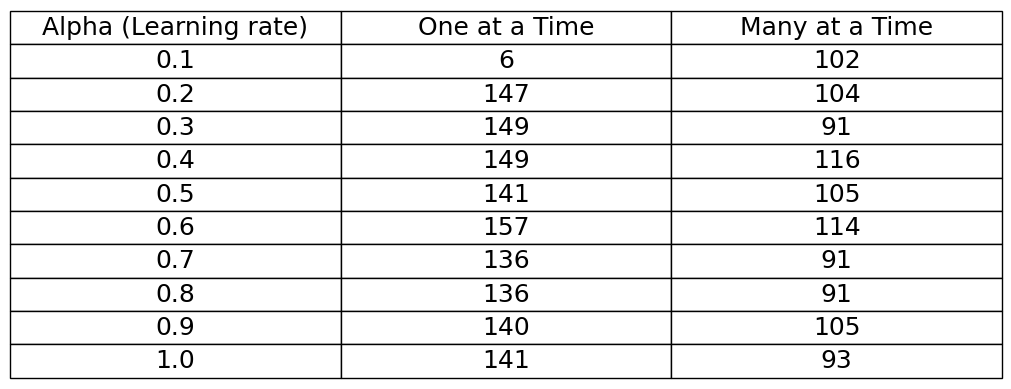

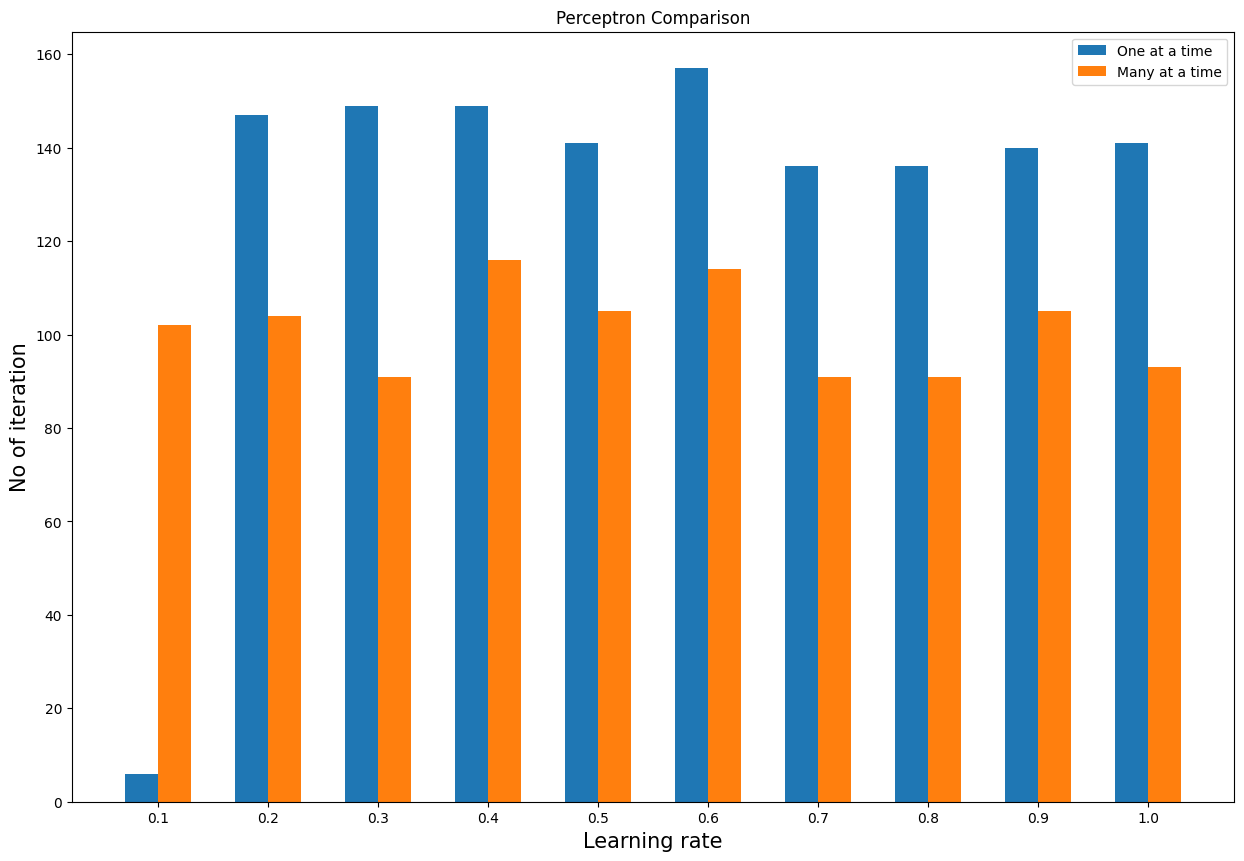

In [33]:
show_statistics(record_all_ones_df, True)

##Output:Initial weight vector (all zeros)

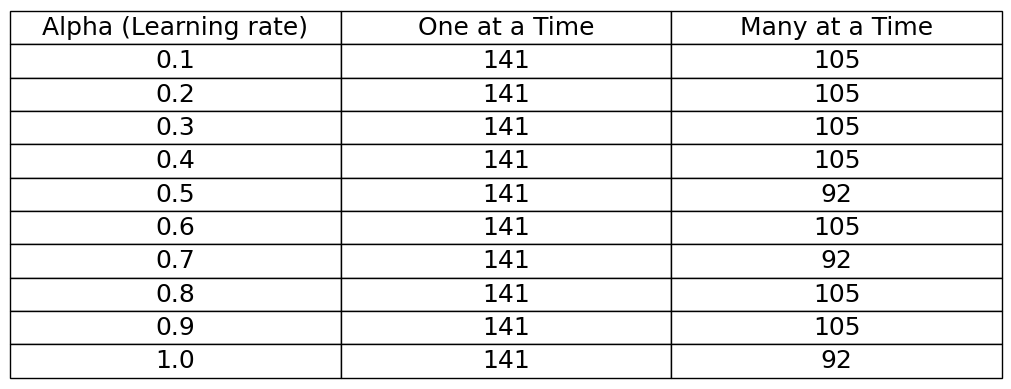

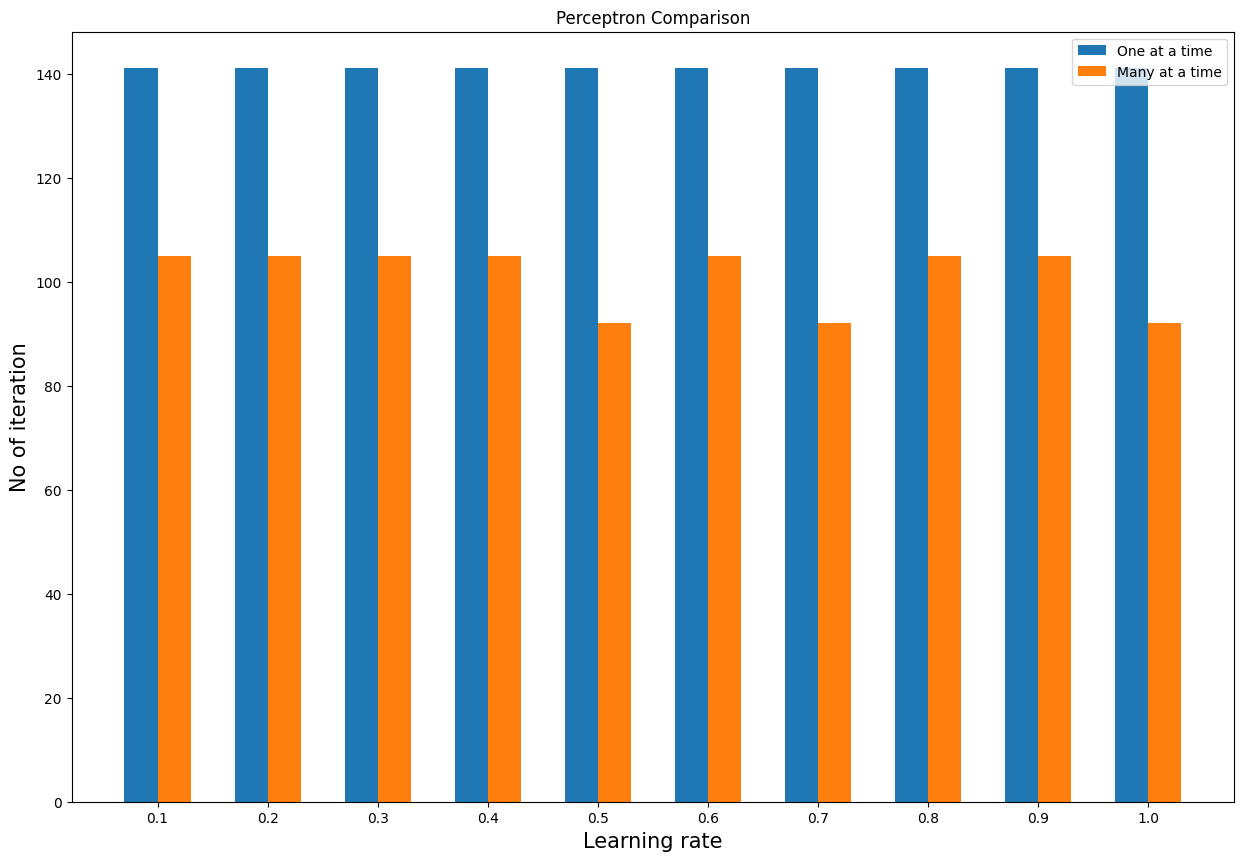

In [34]:
show_statistics(record_all_zeros_df, True)

##Output:Initial weight vector (random)

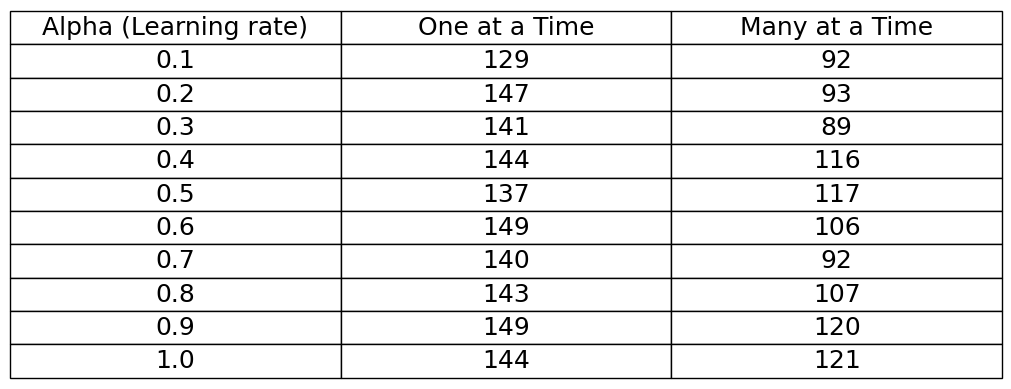

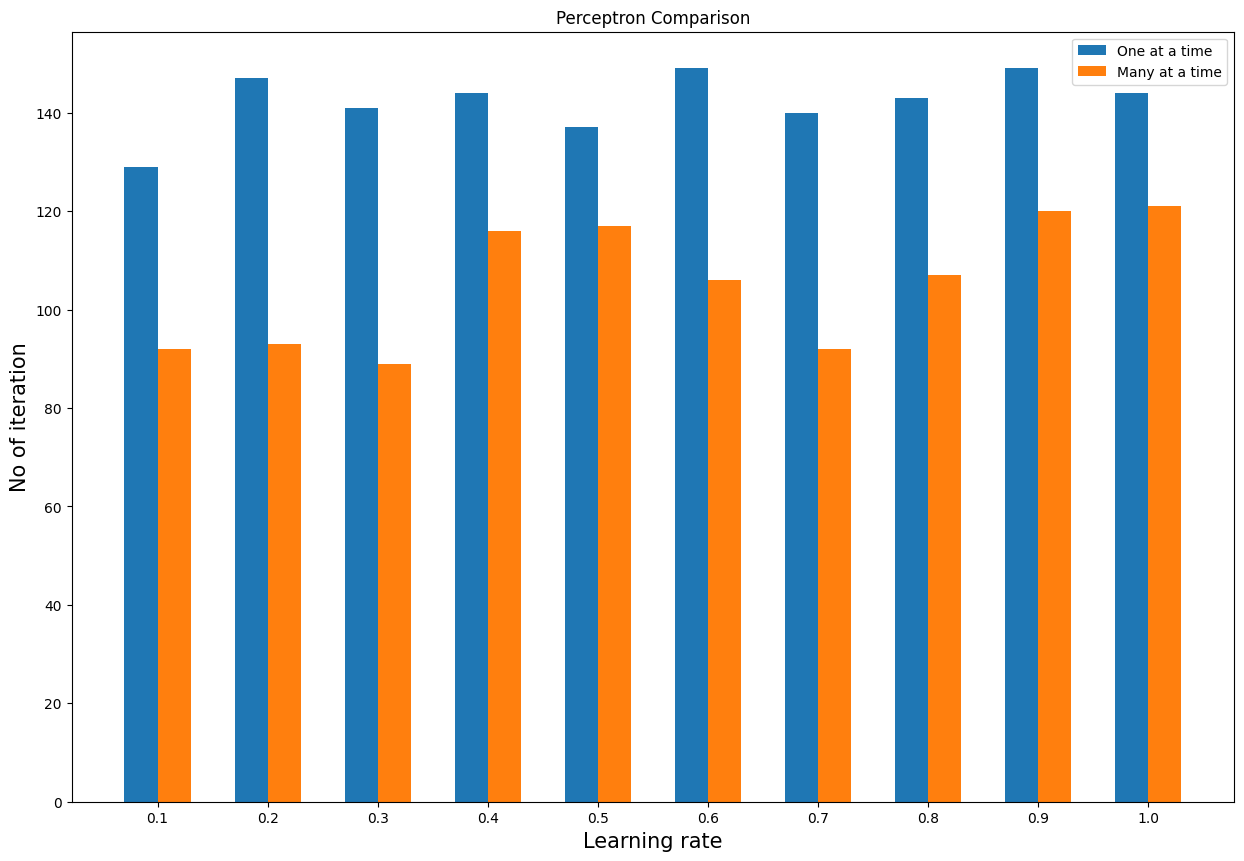

In [35]:
show_statistics(record_random_df, True)

#Questions answers


1. The Reason of taking  sample points to a high dimension is , in given dimention, sample are not linearly separable. The data points can be separable if we increse the dimention.
2.   The answer is given the table below.

Weight all ones



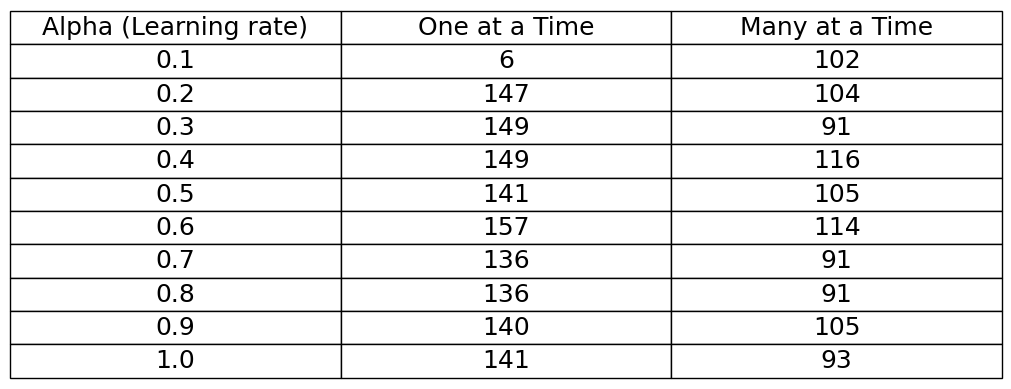

Weight all zeros



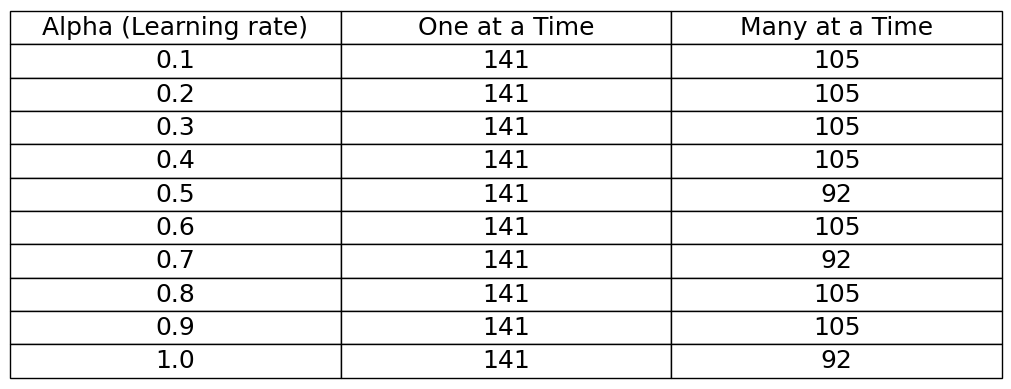

Weight random



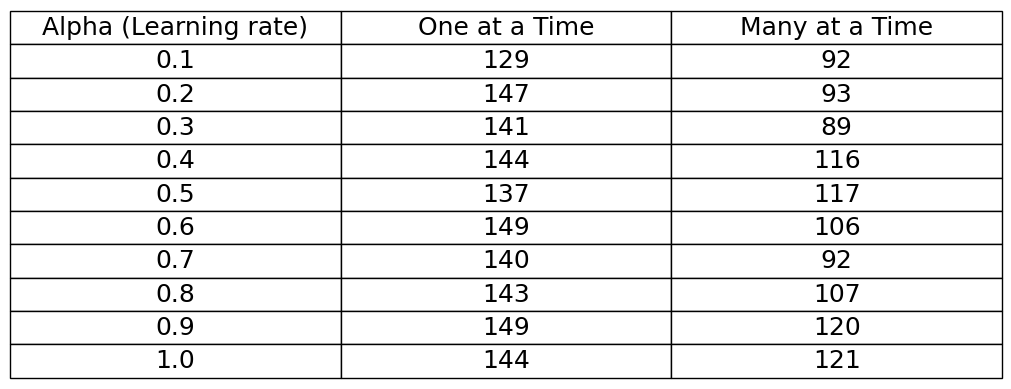

In [36]:
print('Weight all ones\n')
show_statistics(record_all_ones_df, False)
print('Weight all zeros\n')
show_statistics(record_all_zeros_df, False)
print('Weight random\n')
show_statistics(record_random_df, False)